In [1]:
import seaborn as sns
import pandas as pd

In [2]:
tips=sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## How many weekdays are present

In [5]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

## Time of Meal

In [6]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

## Size of Group

In [7]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

## How many people coming for dinner and lunch

In [8]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

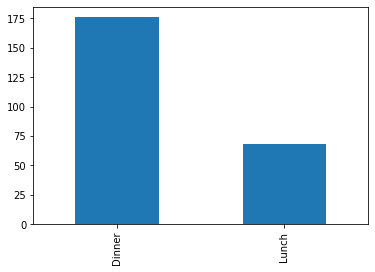

In [9]:
tips.time.value_counts().plot(kind='bar')

In [10]:
tips.time.value_counts(normalize=True)## Creates a percentage to toatal value

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

## When do people tip more

In [11]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

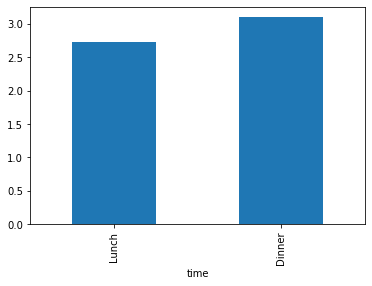

In [12]:
tips.groupby(['time'])['tip'].mean().plot.bar()

## Tip on basis of Gender, Smoker or Non Smoker,Day,Size

In [13]:
tips.sex.value_counts()


Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

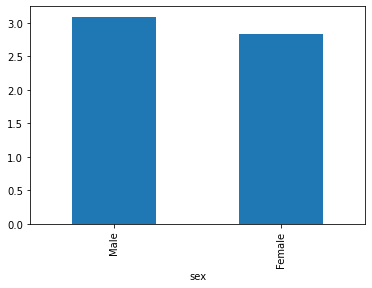

In [14]:
tips.groupby(['sex'])['tip'].mean().plot.bar()

<AxesSubplot:xlabel='smoker'>

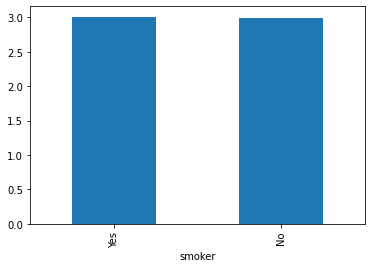

In [15]:
tips.groupby(['smoker'])['tip'].mean().plot.bar()

<AxesSubplot:xlabel='day'>

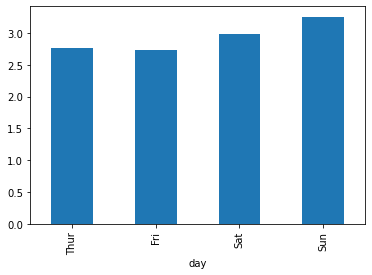

In [16]:
tips.groupby(['day'])['tip'].mean().plot.bar()

<AxesSubplot:xlabel='size'>

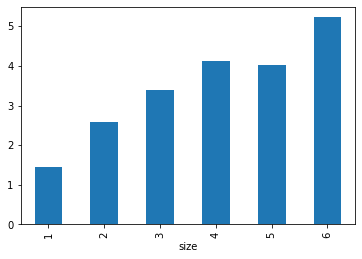

In [17]:
tips.groupby(['size'])['tip'].mean().plot.bar()

## Cross Table for smoker and tips for average tips

In [18]:
tips.groupby(['smoker','sex'])['tip'].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

In [19]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()## Creates a table

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


In [20]:
tips.groupby(['smoker','day'])['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,3.030000,2.7140,2.875476,3.516842
No,2.673778,2.8125,3.102889,3.167895


In [21]:
tips.groupby(['smoker','size'])['tip'].mean().unstack()

size,1,2,3,4,5,6
smoker,,,,,,
Yes,1.460,2.709545,4.095000,3.992727,2.500000,NaN
No,1.415,2.489000,3.069231,4.195769,5.046667,5.225


In [22]:
tips.groupby(['smoker','time'])['tip'].mean().unstack()

time,Lunch,Dinner
smoker,,
Yes,2.834348,3.066000
No,2.673778,3.126887


In [23]:
tips.groupby(['size','time'])['tip'].mean().unstack()

time,Lunch,Dinner
size,,
1,1.875000,1.000000
2,2.423077,2.661923
3,2.754000,3.490000
4,4.218000,4.122500
5,5.000000,3.785000
6,5.300000,5.000000


In [24]:
tips.groupby(['size','day'])['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
size,,,,
1,1.8300,1.920000,1.000000,NaN
2,2.4425,2.644375,2.517547,2.816923
3,2.6925,3.000000,3.797778,3.120667
4,4.2180,4.730000,4.123846,4.087778
5,5.0000,NaN,3.000000,4.046667
6,5.3000,NaN,NaN,5.000000


In [25]:
tips.groupby(['size','sex'])['tip'].mean().unstack()

sex,Male,Female
size,,
1,1.920000,1.276667
2,2.614184,2.528448
3,3.476667,3.250000
4,4.172143,4.021111
5,3.750000,5.140000
6,5.850000,4.600000


## Percentage of tip compared to different parameters

In [26]:
tips['Percentage of Tip']=tips.tip/tips.total_bill
tips.head()

,total_bill,tip,sex,smoker,day,time,size,Percentage of Tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [27]:
tips.groupby(['sex'])['Percentage of Tip'].mean()

sex
Male      0.157651
Female    0.166491
Name: Percentage of Tip, dtype: float64

<AxesSubplot:xlabel='time'>

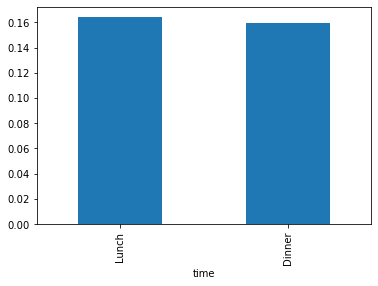

In [51]:
tips.groupby(['time'])['Percentage of Tip'].mean().plot.bar()

<AxesSubplot:xlabel='sex'>

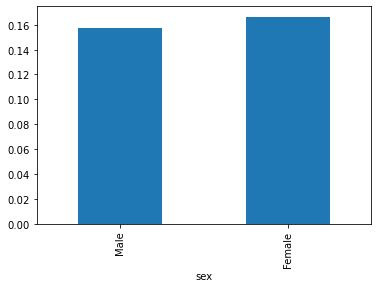

In [46]:
tips.groupby(['sex'])['Percentage of Tip'].mean().plot.bar()

<AxesSubplot:xlabel='size'>

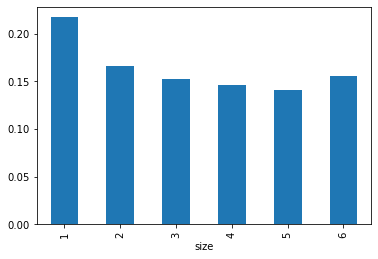

In [48]:
tips.groupby(['size'])['Percentage of Tip'].mean().plot.bar()

<AxesSubplot:xlabel='day'>

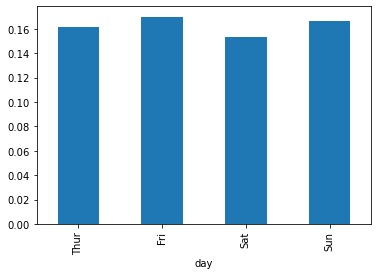

In [49]:
tips.groupby(['day'])['Percentage of Tip'].mean().plot.bar()

## Relation between total bill and tips

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

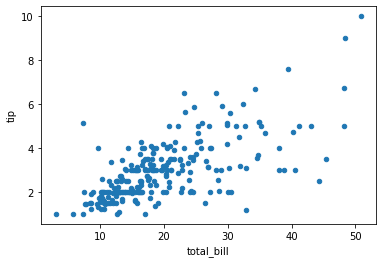

In [30]:
tips.plot.scatter(x='total_bill',y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='Percentage of Tip'>

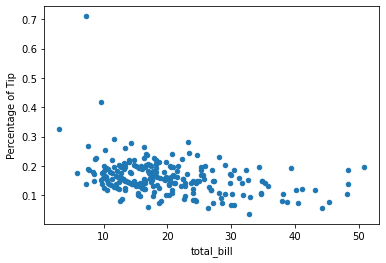

In [31]:
tips.plot.scatter(x='total_bill',y='Percentage of Tip')

## Using seaborn library

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

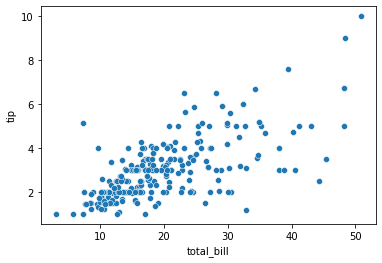

In [32]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

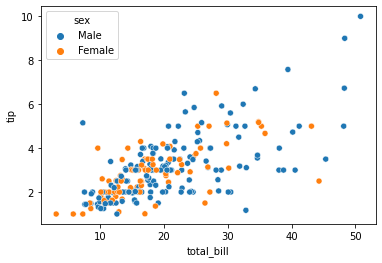

In [33]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='sex')

In [34]:
## Above graph shows male give more tip than females

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

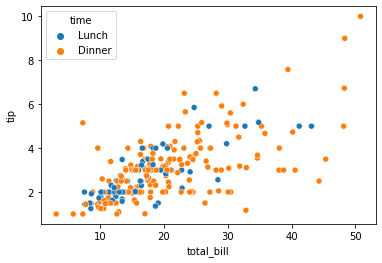

In [35]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='time')

In [36]:
## Dinner time more tips because more people are going 

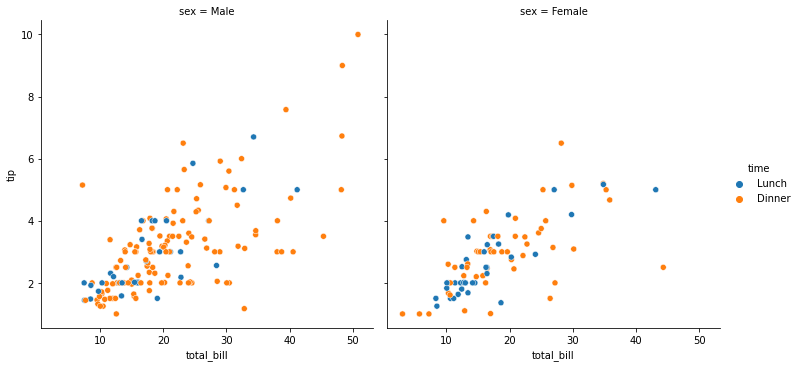

In [37]:
sns.relplot(x='total_bill',
           y='tip',
           data=tips,
           col='sex',
           hue='time')

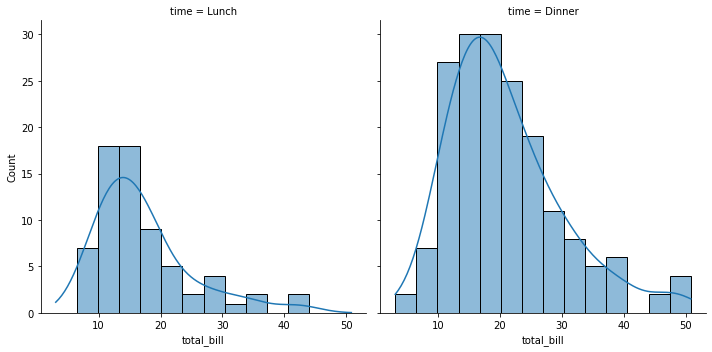

In [38]:
sns.displot(data=tips,x='total_bill',col='time',kde=True)

## Creating corellation and distribution by all numeric variables

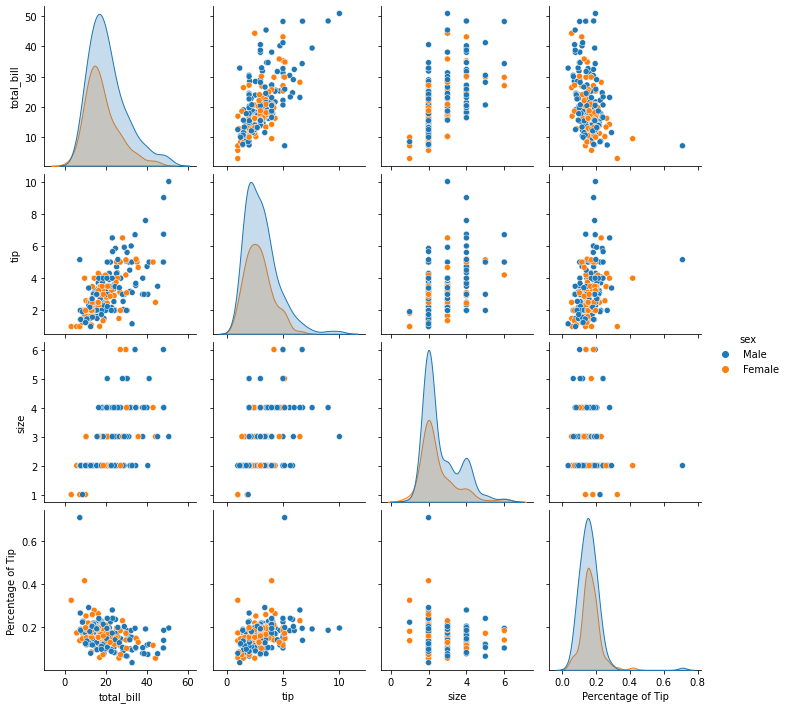

In [39]:
sns.pairplot(data=tips,hue='sex')